In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
test = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
greeks = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')

In [3]:
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [4]:
train['EJ']

0      B
1      A
2      B
3      B
4      B
      ..
612    A
613    B
614    A
615    B
616    A
Name: EJ, Length: 617, dtype: object

In [5]:
train['EJ'] = train['EJ'].replace({'A': 0, 'B': 1})
test['EJ'] = test['EJ'].replace({'A': 0, 'B': 1})

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [7]:
train.shape

(617, 58)

In [8]:
test.shape

(5, 57)

In [9]:
train = train.fillna(train.mean())

In [10]:
X = np.array(train.drop(['Id', 'Class'], axis=1))
y = np.array(train['Class'])
raw = test.copy()
test = np.array(test.drop(['Id'], axis=1))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_val -= mean
X_val /= std

In [14]:
y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')

In [15]:
from keras import regularizers

model = keras.Sequential([layers.BatchNormalization(),
                          layers.Dense(16, activation='relu'),
                          layers.Dropout(0.1),
                          layers.Dense(16, activation='relu'),
                          layers.Dropout(0.1),
                          layers.Dense(1, activation='sigmoid')])

In [16]:
model = model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [17]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import RandomizedSearchCV


def create_model(optimizer='adam', init='glorot_uniform'):
    model = Sequential()
    model.add(layers.BatchNormalization())
    model.add(Dense(16, kernel_initializer=init, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(Dense(16, kernel_initializer=init, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [1,5,10,20,30,40,50,100,200]
batches = [10, 20, 40, 60, 80, 100,200,500]

param_dist = dict(optimizer=optimizer, epochs=epochs, batch_size=batches, init=init)
rand = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_jobs=1, cv=3, n_iter=5)  # n_iter controls the number of different combinations
rand_result = rand.fit(X_train, y_train)

In [18]:
print("Best: %f using %s" % (rand_result.best_score_, rand_result.best_params_))
means = rand_result.cv_results_['mean_test_score']
stds = rand_result.cv_results_['std_test_score']
params = rand_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.876250 using {'optimizer': 'Adam', 'init': 'glorot_uniform', 'epochs': 50, 'batch_size': 40}
0.835637 (0.028019) with: {'optimizer': 'Adagrad', 'init': 'uniform', 'epochs': 20, 'batch_size': 10}
0.835649 (0.023119) with: {'optimizer': 'Adagrad', 'init': 'normal', 'epochs': 200, 'batch_size': 500}
0.876250 (0.011667) with: {'optimizer': 'Adam', 'init': 'glorot_uniform', 'epochs': 50, 'batch_size': 40}
0.835637 (0.028019) with: {'optimizer': 'Adam', 'init': 'normal', 'epochs': 5, 'batch_size': 40}
0.522715 (0.275360) with: {'optimizer': 'Adagrad', 'init': 'glorot_uniform', 'epochs': 10, 'batch_size': 80}


In [19]:
model = keras.Sequential([layers.BatchNormalization(),
                          layers.Dense(16, kernel_initializer='normal', activation='relu'),
                          layers.Dropout(0.1),
                          layers.Dense(16, kernel_initializer='normal', activation='relu'),
                          layers.Dropout(0.1),
                          layers.Dense(1, activation='sigmoid')])

#optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.05)
model.compile(optimizer='Adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train,
                   epochs=100, batch_size=20, 
                    validation_data=(X_val, y_val))

Epoch 1/100
25/25 [==============================] - 2s 14ms/step - loss: 0.6441 - accuracy: 0.8053 - val_loss: 0.7346 - val_accuracy: 0.7823
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5196 - accuracy: 0.8357 - val_loss: 0.7115 - val_accuracy: 0.7823
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3675 - accuracy: 0.8357 - val_loss: 0.6456 - val_accuracy: 0.7823
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2984 - accuracy: 0.8398 - val_loss: 0.5959 - val_accuracy: 0.7823
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2753 - accuracy: 0.8580 - val_loss: 0.5004 - val_accuracy: 0.7903
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2493 - accuracy: 0.8905 - val_loss: 0.4255 - val_accuracy: 0.7984
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2356 - accuracy: 0.8925 - val_loss: 0.3930 - val_accuracy: 0.8065
Epoch 8/100


In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

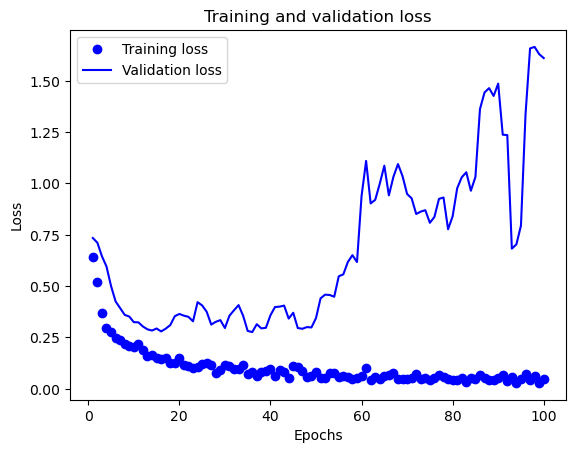

In [22]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

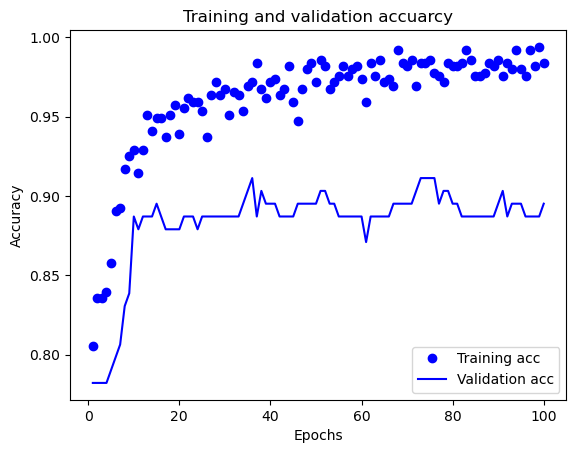

In [23]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
model = keras.Sequential([layers.BatchNormalization(),
                          layers.Dense(16, kernel_initializer='normal', activation='relu'),
                          layers.Dropout(0.1),
                          layers.Dense(16, kernel_initializer='normal', activation='relu'),
                          layers.Dropout(0.1),
                          layers.Dense(1, activation='sigmoid')])

#optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.05)
model.compile(optimizer='Adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train,
                   epochs=15, batch_size=20, 
                    validation_data=(X_val, y_val))

Epoch 1/15
25/25 [==============================] - 2s 13ms/step - loss: 0.6563 - accuracy: 0.7870 - val_loss: 0.7076 - val_accuracy: 0.7823
Epoch 2/15
25/25 [==============================] - 0s 5ms/step - loss: 0.5471 - accuracy: 0.8357 - val_loss: 0.7397 - val_accuracy: 0.7823
Epoch 3/15
25/25 [==============================] - 0s 5ms/step - loss: 0.4095 - accuracy: 0.8357 - val_loss: 0.7358 - val_accuracy: 0.7823
Epoch 4/15
25/25 [==============================] - 0s 5ms/step - loss: 0.3142 - accuracy: 0.8377 - val_loss: 0.7345 - val_accuracy: 0.7823
Epoch 5/15
25/25 [==============================] - 0s 5ms/step - loss: 0.2977 - accuracy: 0.8540 - val_loss: 0.6826 - val_accuracy: 0.7823
Epoch 6/15
25/25 [==============================] - 0s 5ms/step - loss: 0.2628 - accuracy: 0.8783 - val_loss: 0.6127 - val_accuracy: 0.8065
Epoch 7/15
25/25 [==============================] - 0s 5ms/step - loss: 0.2292 - accuracy: 0.8925 - val_loss: 0.5335 - val_accuracy: 0.8226
Epoch 8/15
25/25 [=

In [25]:
results = model.evaluate(X_val,y_val)
results

4/4 [==============================] - 0s 3ms/step - loss: 0.3346 - accuracy: 0.8629


[0.3345922529697418, 0.8629032373428345]

Drop out(0.25) - 0.5952, 0.8548
l2 - 0.8328,0.8468
l1 - 0.6231, 0.8226
normal - 0.4730, 0.8306
Drop out(0.1) - 0.2562, 0.8952
batch with drop out - 0.3252, 0.8629

In [26]:
val_pred = model.predict(X_val)
val_pred = val_pred.round()
from sklearn.metrics import classification_report
print(classification_report(y_val, val_pred))

4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92        97
         1.0       0.92      0.41      0.56        27

    accuracy                           0.86       124
   macro avg       0.89      0.70      0.74       124
weighted avg       0.87      0.86      0.84       124



In [27]:
final_predictions = model.predict(test)
final_predictions = final_predictions.round()

1/1 [==============================] - 0s 28ms/step


In [28]:
class_0_probabilities = 1 - final_predictions
class_1_probabilities = final_predictions

In [29]:
my_submission = raw.copy()
my_submission = my_submission[['Id']]
my_submission[['class_0']] = 1-final_predictions
my_submission[['class_1']] = final_predictions

In [30]:
my_submission.to_csv('submission.csv', index=False)